In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [6]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
# change the all columns names
colum = [ 'wins', 'AtBats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen' ,'Bases', 
         'RunsAllowed', 'EarnedRuns', 'ERA', 'Shutouts', 'Saves', 'CompleteGames','Errors']
        
df.columns = colum

In [8]:
df.head(3)

,wins,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen,Bases,RunsAllowed,EarnedRuns,ERA,Shutouts,Saves,CompleteGames,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79


In [9]:
df.shape  # shape of the dataset in rows & columns
#          this dataset is too small

(30, 17)

In [10]:
df.isnull().sum()  # No null value is in dataset

wins             0
AtBats           0
Hits             0
Doubles          0
Triples          0
Homeruns         0
Walks            0
Strikeouts       0
Stolen           0
Bases            0
RunsAllowed      0
EarnedRuns       0
ERA              0
Shutouts         0
Saves            0
CompleteGames    0
Errors           0
dtype: int64

In [11]:
#
df.info()     # have no object type feature in dataset
#             all features have continuous value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wins           30 non-null     int64  
 1   AtBats         30 non-null     int64  
 2   Hits           30 non-null     int64  
 3   Doubles        30 non-null     int64  
 4   Triples        30 non-null     int64  
 5   Homeruns       30 non-null     int64  
 6   Walks          30 non-null     int64  
 7   Strikeouts     30 non-null     int64  
 8   Stolen         30 non-null     int64  
 9   Bases          30 non-null     int64  
 10  RunsAllowed    30 non-null     int64  
 11  EarnedRuns     30 non-null     int64  
 12  ERA            30 non-null     float64
 13  Shutouts       30 non-null     int64  
 14  Saves          30 non-null     int64  
 15  CompleteGames  30 non-null     int64  
 16  Errors         30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [12]:
# statistical information
df.describe()

,wins,AtBats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen,Bases,RunsAllowed,EarnedRuns,ERA,Shutouts,Saves,CompleteGames,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

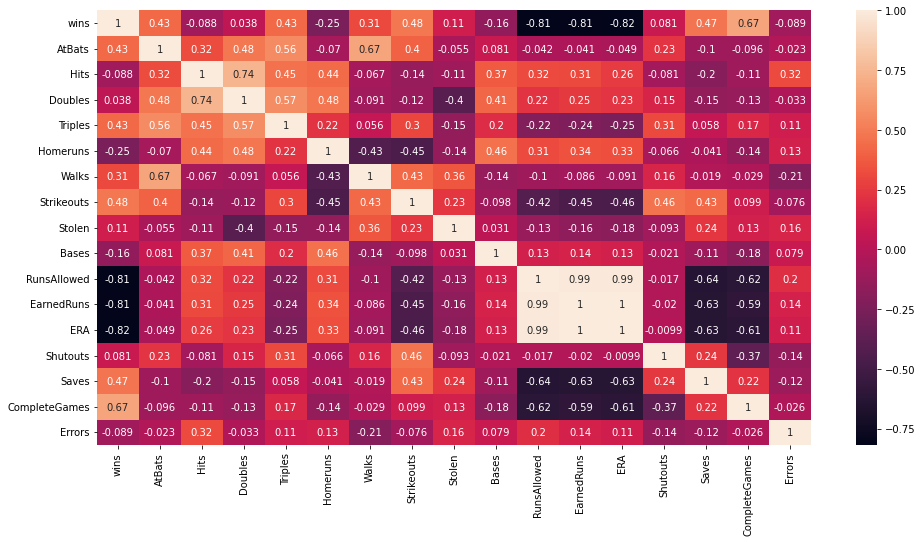

In [13]:
# checking correlation through heatmap

plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

# 'EarnedRuns' & 'ERA' are highly positive correlated with 'RunsAllowed', 
#    'EarnedRuns','ERA'& ''RunsAllowed   these all features are highly negative correlted to 'wins'
# some features medium positive correlated with target_feature

<Figure size 2880x2880 with 0 Axes>

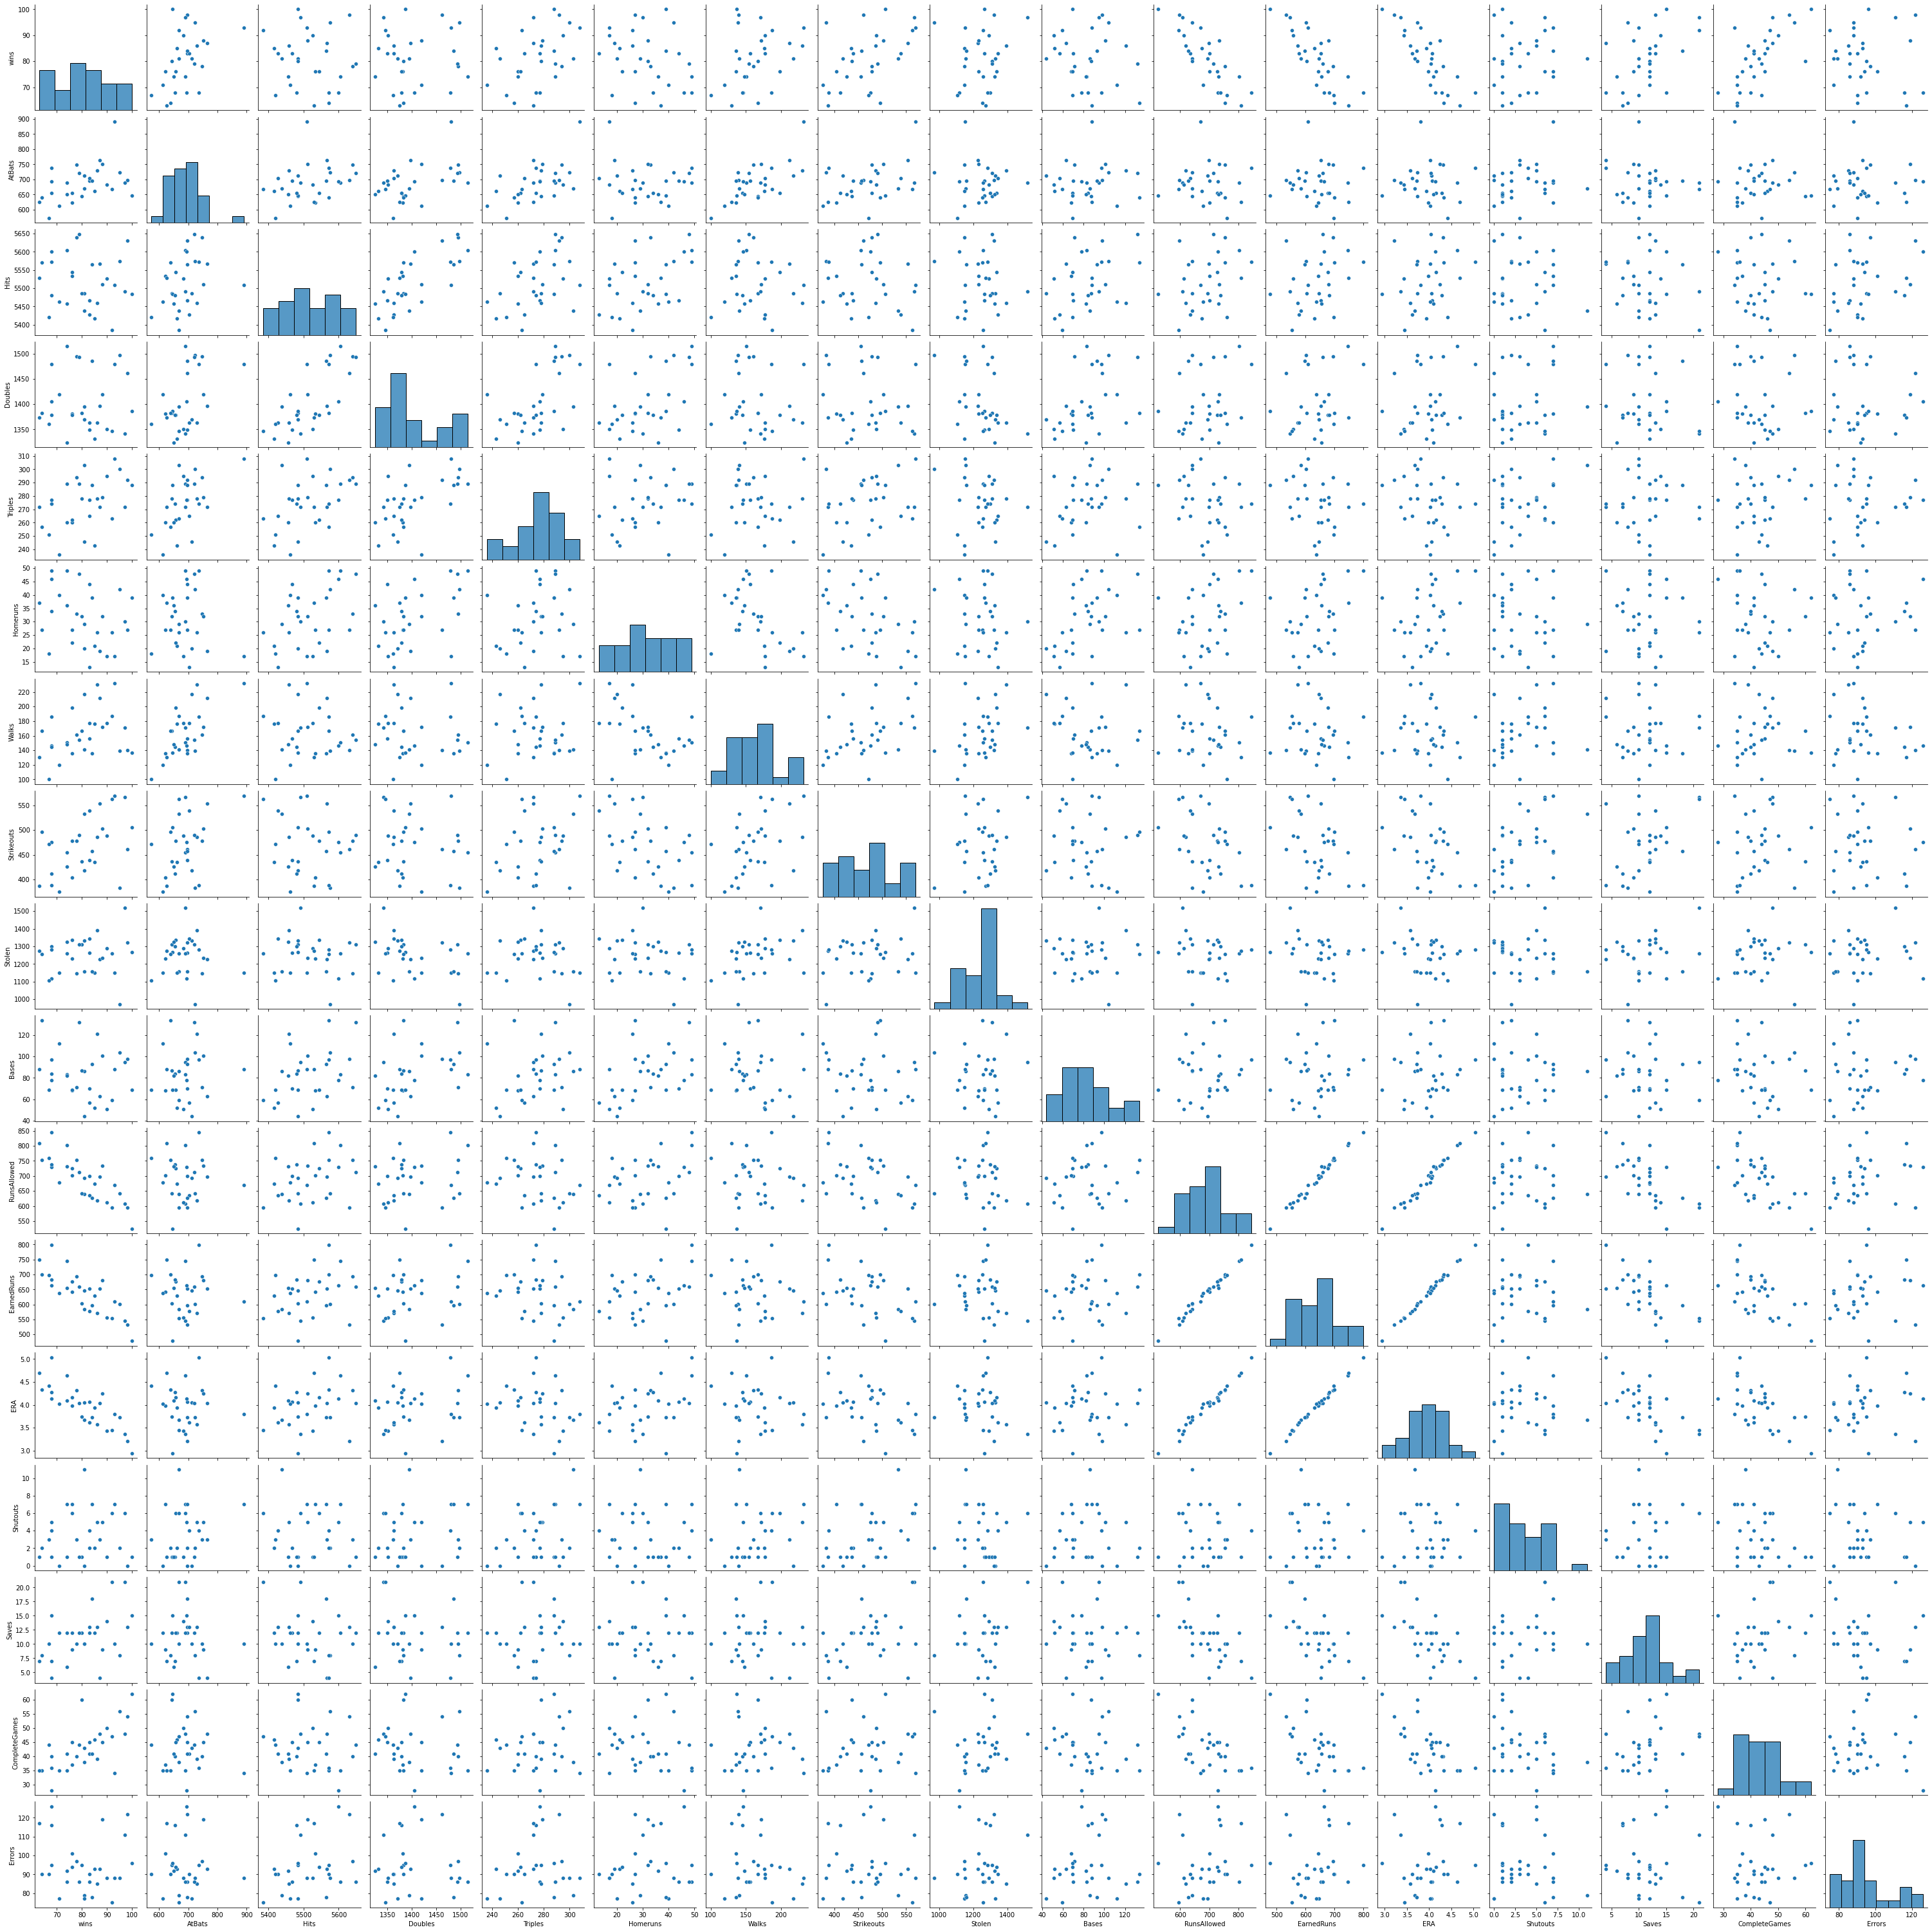

In [14]:
# plotting pairplot
plt.figure(figsize=(40,40))
sns.pairplot(df,)
plt.show()
#

<AxesSubplot:xlabel='wins', ylabel='Density'>

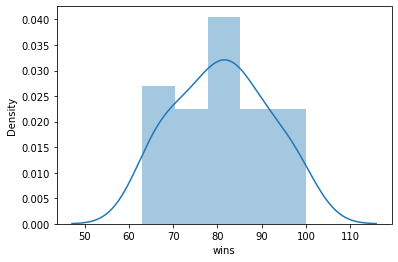

In [15]:
#plotting distribution plot of 'wins'

sns.distplot(df['wins'])
# no skewness  in 'wins' according distribution plot

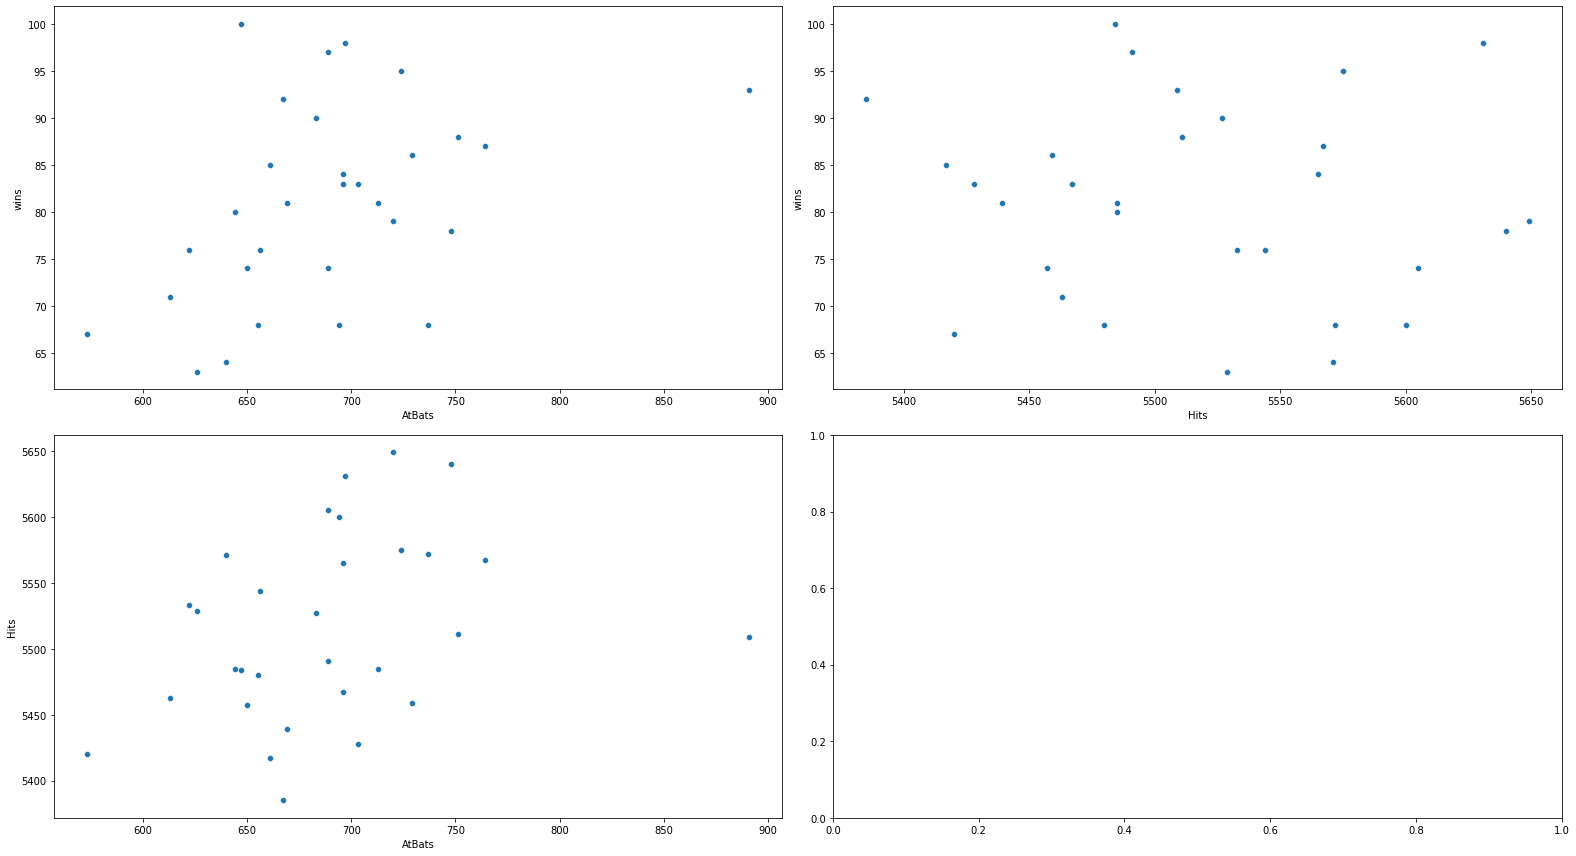

In [16]:
#plotting scatterplot with 'AtBats' & 'Hits' vs 'wins'
fig,axes= plt.subplots(2,2,figsize=(22,12))
sns.scatterplot('AtBats','wins', data=df,ax=axes[0,0])
sns.scatterplot('Hits','wins', data=df,ax=axes[0,1])
sns.scatterplot('AtBats','Hits', data=df,ax=axes[1,0])
plt.tight_layout()

# 'AtBats' vs 'Hits' in both columns have  correlated to each other
# 'Hits' randomly distributed with 'wins',  no relation seen between this 

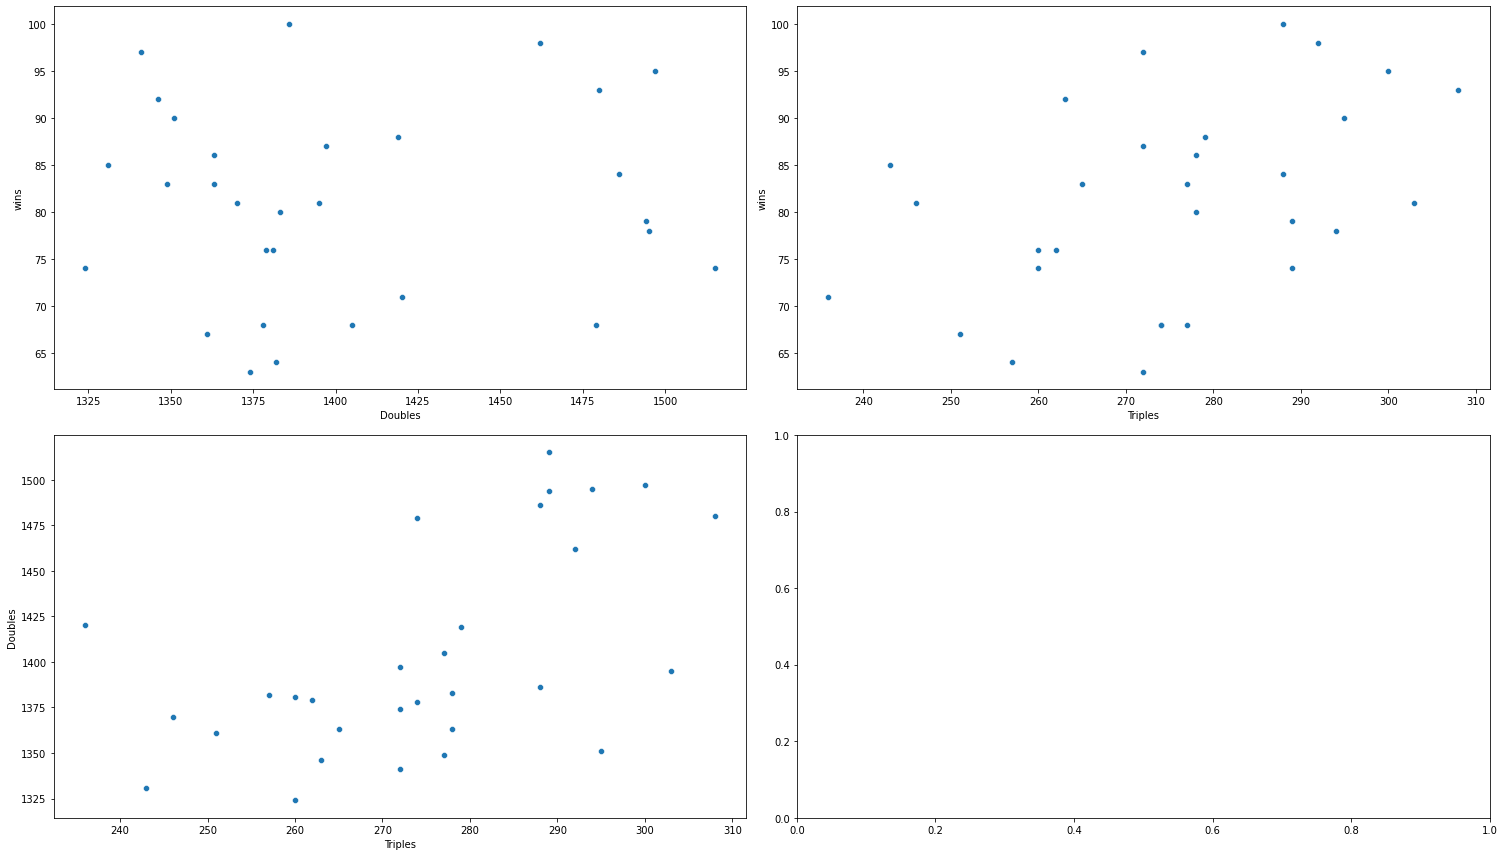

In [17]:
#plotting scatterplot  with 'Doubles' & 'Triples' vs 'wins'

fig,axes= plt.subplots(2,2,figsize=(21,12))
sns.scatterplot('Doubles','wins', data=df,ax=axes[0,0])
sns.scatterplot('Triples','wins', data=df,ax=axes[0,1])
sns.scatterplot('Triples','Doubles', data=df,ax=axes[1,0])
plt.tight_layout()
#
#'Triples' vs 'wins' have correlated to each other 
# 'Doubles' vs 'wins' have no any relation seen in scatterplot, randomly distributed to each other

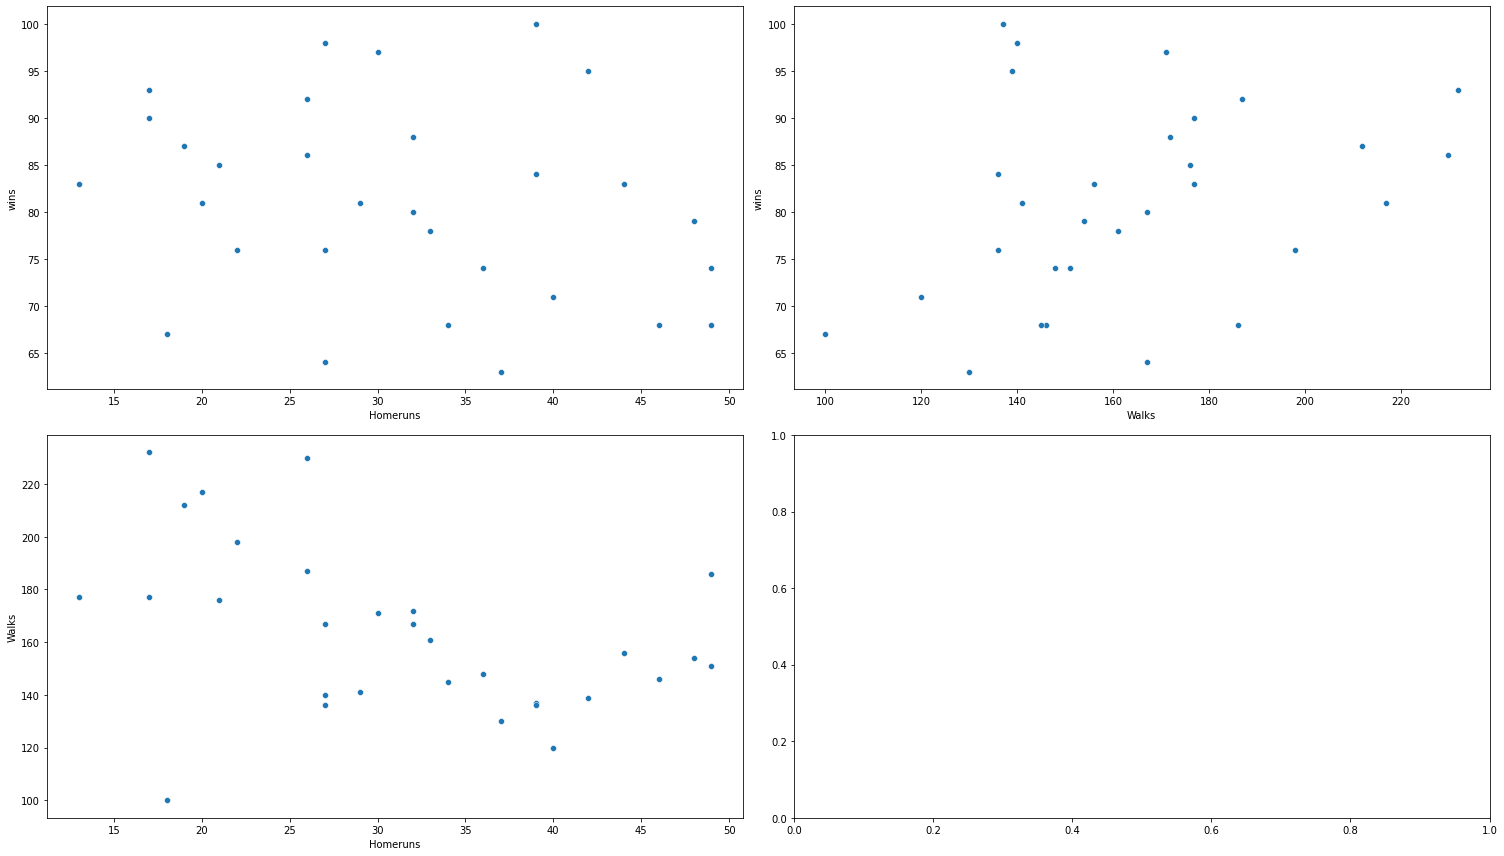

In [113]:
#  plotting scatterplot with 'Homeruns' & 'Walks' vs 'wins'

fig,axes= plt.subplots(2,2,figsize=(21,12))
sns.scatterplot('Homeruns','wins', data=df,ax=axes[0,0])
sns.scatterplot('Walks','wins', data=df,ax=axes[0,1])
sns.scatterplot('Homeruns','Walks', data=df,ax=axes[1,0])
plt.tight_layout()
#
# 'Walks' vs 'wins' in both features have some correlated to each other
# 'Walks' vs 'Homeruns' in both columns have no any relation shown in scatterplot 

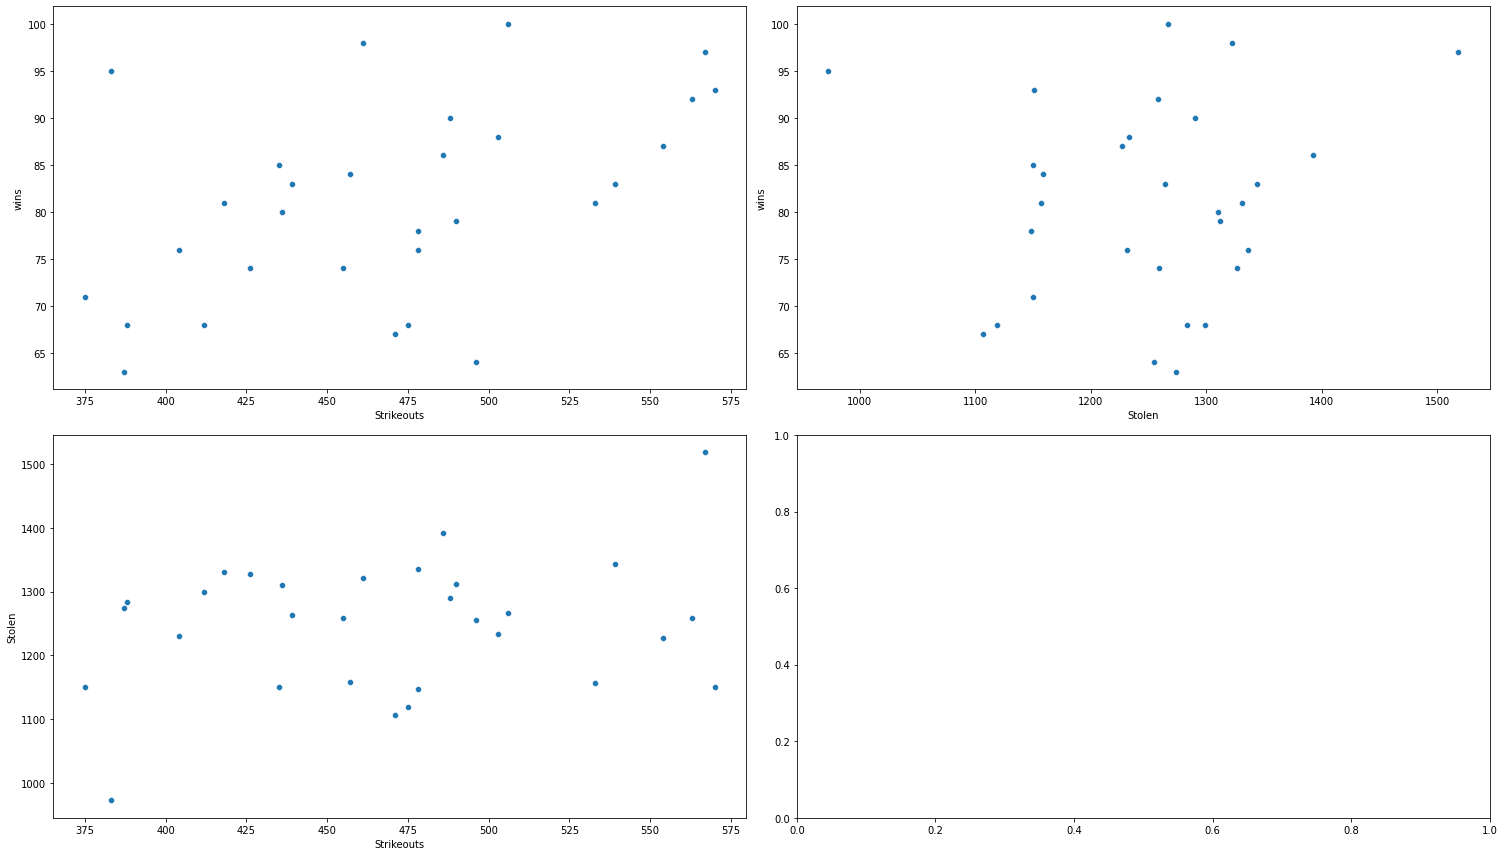

In [18]:
#plotting scatterplot  with 'Strikeouts' & 'Stolen' vs 'wins'

fig,axes= plt.subplots(2,2,figsize=(21,12))
sns.scatterplot('Strikeouts','wins', data=df,ax=axes[0,0])
sns.scatterplot('Stolen','wins', data=df,ax=axes[0,1])
sns.scatterplot('Strikeouts','Stolen', data=df,ax=axes[1,0])
plt.tight_layout()
#
# 'Strikeouts' with 'wins' looking some positive correlated 
#  'Stolen' minimum correlated with 'wins'
# 'Stolen' & 'Strikeouts' both randomly distributed with each other

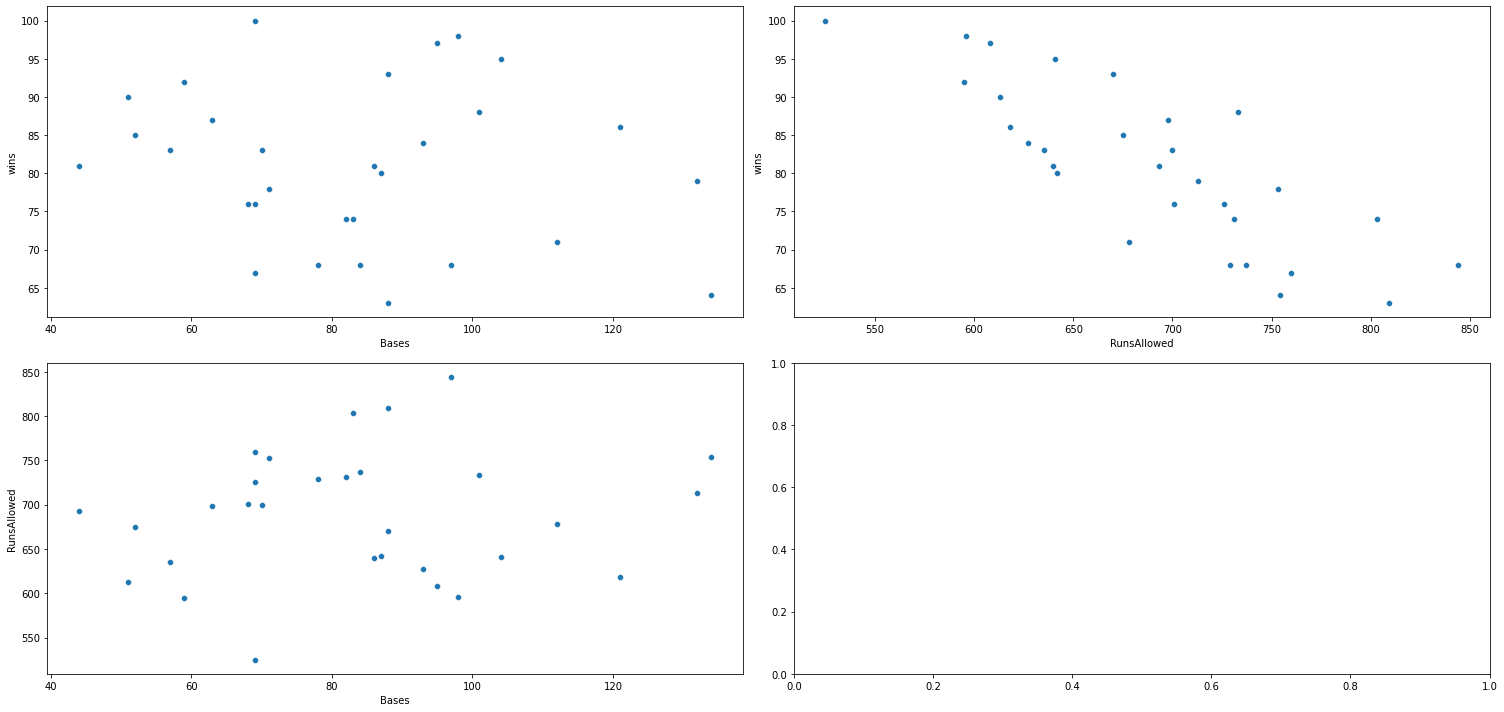

In [19]:
#  plotting scatterplot  ('Bases' & 'RunsAllowed') vs 'wins'

fig,axes= plt.subplots(2,2,figsize=(21,10))
sns.scatterplot('Bases','wins', data=df,ax=axes[0,0])
sns.scatterplot('RunsAllowed','wins', data=df,ax=axes[0,1])
sns.scatterplot('Bases','RunsAllowed', data=df,ax=axes[1,0])
plt.tight_layout()
#
#  'RunsAllowed' is negative correlated with 'wins' and 'Bases' is not
#  'RunsAllowed' & 'Bases' both are randomly distributed with each other

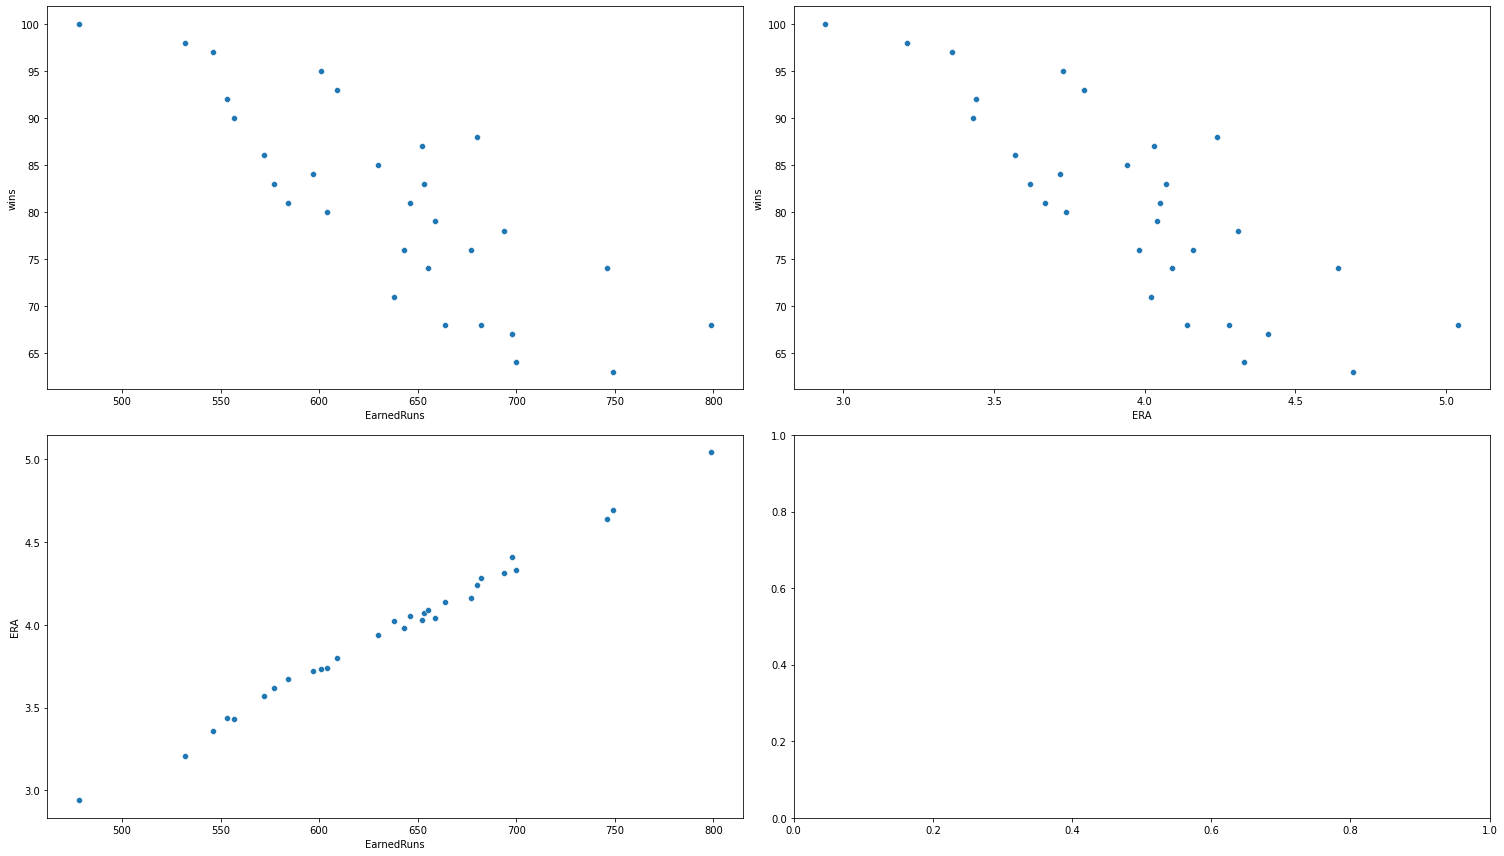

In [20]:
#plotting scatterplot  ('EarnedRuns' & 'ERA' ) vs 'wins'

fig,axes= plt.subplots(2,2,figsize=(21,12))
sns.scatterplot('EarnedRuns','wins', data=df,ax=axes[0,0])
sns.scatterplot('ERA','wins', data=df,ax=axes[0,1])
sns.scatterplot('EarnedRuns','ERA', data=df,ax=axes[1,0])
plt.tight_layout()
#
# shown in scatterplot ('ERA', 'EarnedRuns') these two features are negative correlated with 'wins'
#  'EarnedRuns' & 'ERA' both features are positive corellated with each other 

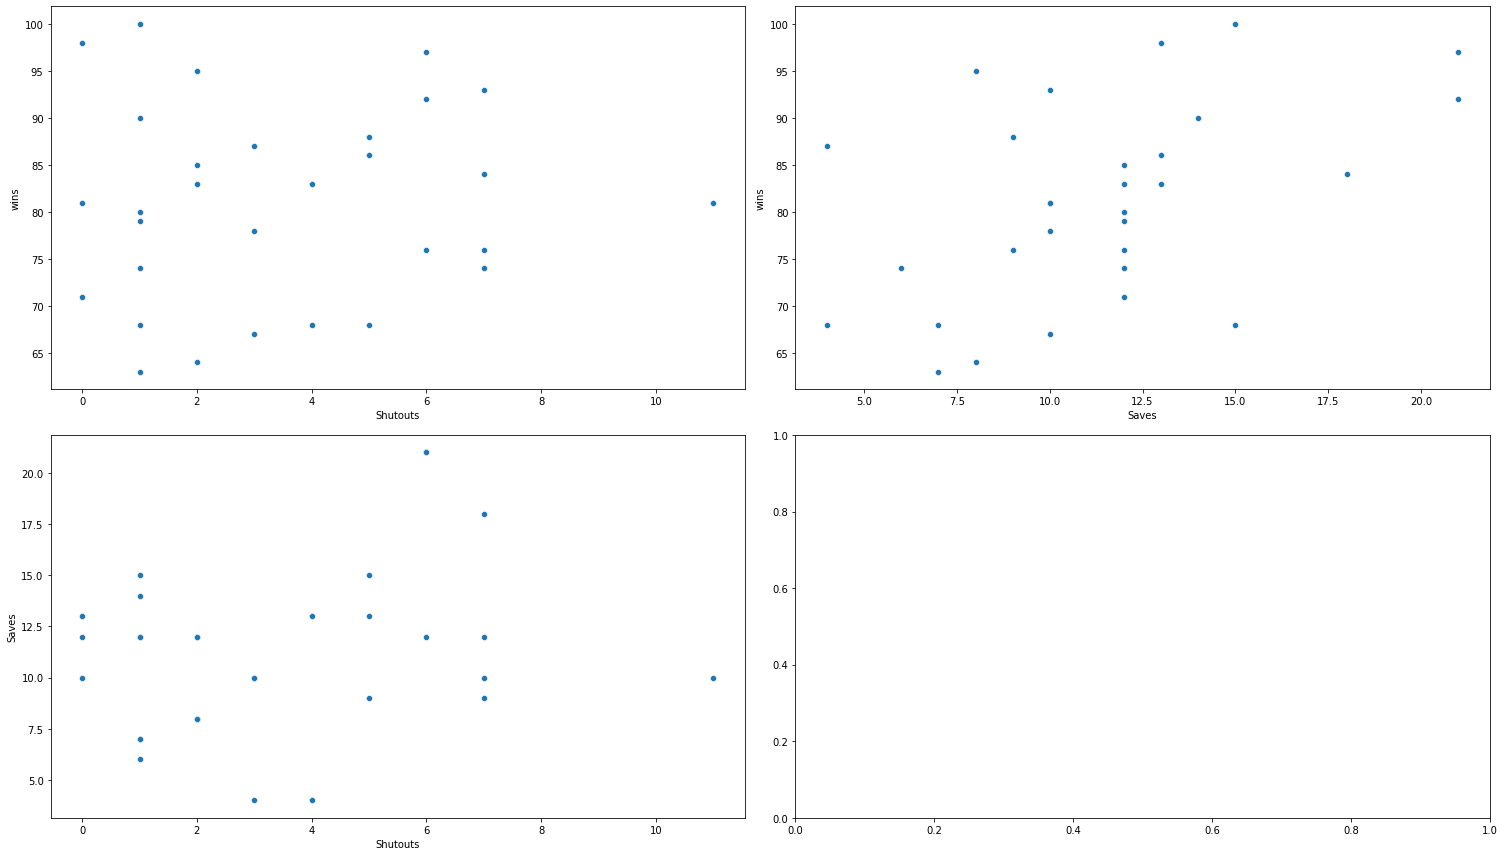

In [21]:
#  plotting scatterplot  ('Shutouts' & 'Saves') vs 'wins'
    
fig,axes= plt.subplots(2,2,figsize=(21,12))
sns.scatterplot('Shutouts','wins', data=df,ax=axes[0,0])
sns.scatterplot('Saves','wins', data=df,ax=axes[0,1])
sns.scatterplot('Shutouts','Saves', data=df,ax=axes[1,0])
plt.tight_layout()
#
#  'Saves' vs 'wins' showing some relation as like as 'saves' going higher then 'wins' also higher
#   in scatterplot 'saves' vs 'shutouts' shown no any relationship as like as randomly distributed 

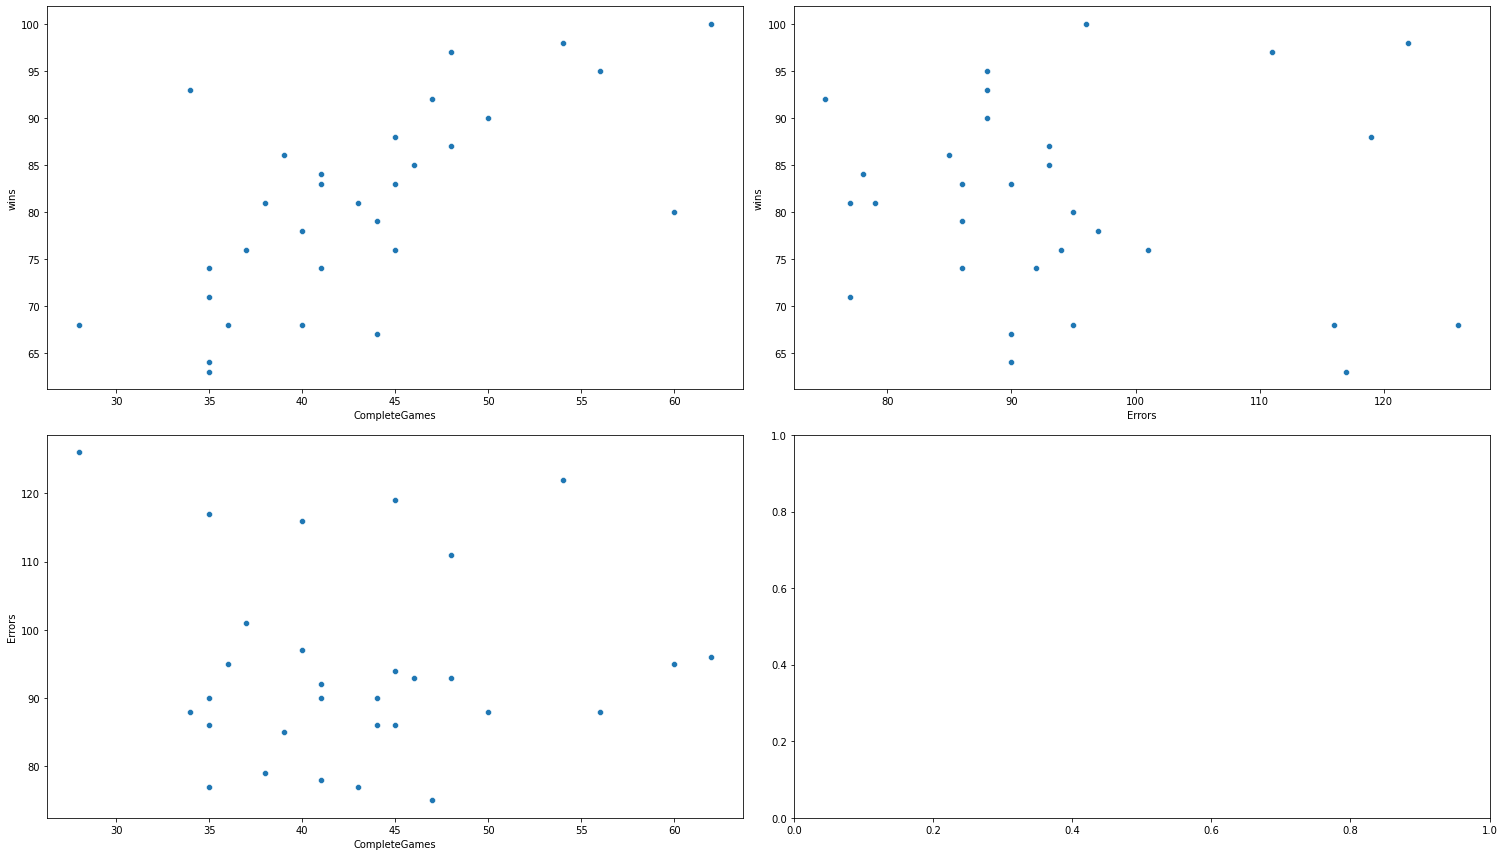

In [22]:
              #plotting scatterplot  'Doubles' & 'Triples' vs 'wins'
fig,axes= plt.subplots(2,2,figsize=(21,12))
sns.scatterplot('CompleteGames','wins', data=df,ax=axes[0,0])
sns.scatterplot('Errors','wins', data=df,ax=axes[0,1])
sns.scatterplot('CompleteGames','Errors', data=df,ax=axes[1,0])
plt.tight_layout()
#
# in this plot 'wins' vs 'CompleteGames' see some relation as 'wins' is going higher then 'CompleteGames' is also going higher
# 'CompleteGames' vs 'Errors' showing no any relation between distribution , randomly distributed

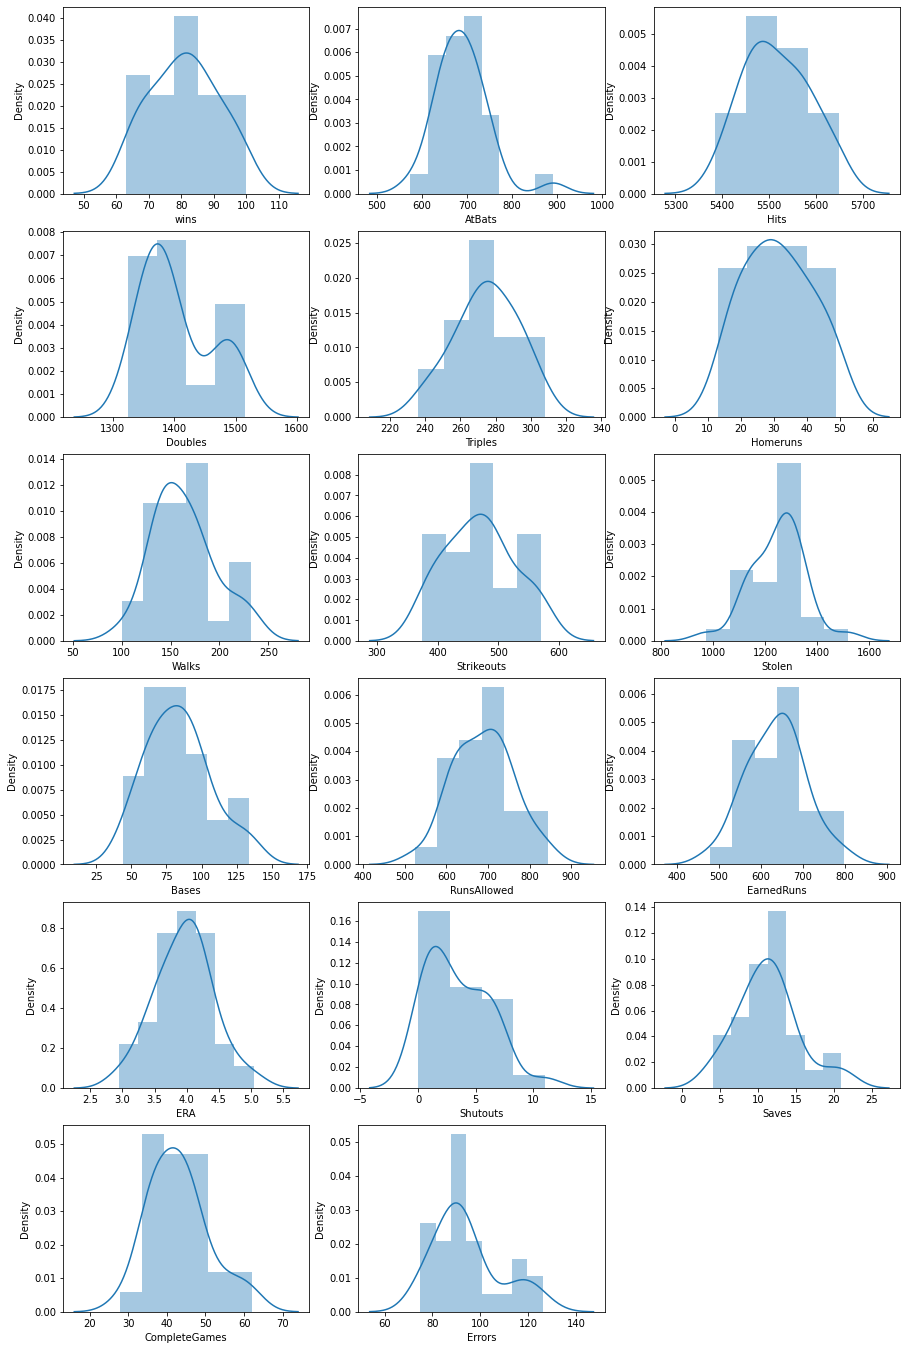

In [23]:
# lets see how is data distributed of each feature  / CHECK DATA IS NORMAAL DISTRIBUTED OR NOT
plt.figure(figsize=(15,24),)
p=1
for col in df:
    if p <=17:
        ax = plt.subplot(6,3,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

  TREATING SKEWNESS

In [24]:
# input features
x= df.drop('wins', axis=1)

In [82]:
x.skew()

AtBats           1.200786
Hits             0.183437
Doubles          0.670254
Triples         -0.230650
Homeruns         0.129502
Walks            0.516441
Strikeouts       0.158498
Stolen          -0.156065
Bases            0.479893
RunsAllowed      0.045734
EarnedRuns       0.058710
ERA              0.053331
Shutouts         0.736845
Saves            0.565790
CompleteGames    0.657524
Errors           0.890132
dtype: float64

In [25]:
#                removing skewness
for index in x.skew().index:
    if x.skew().loc[index]> 0.60:
        x[index]= np.log1p(x[index])
        
print('checking again skewness\n',x.skew())

checking again skewness
 AtBats           0.744813
Hits             0.183437
Doubles          0.628584
Triples         -0.230650
Homeruns         0.129502
Walks            0.516441
Strikeouts       0.158498
Stolen          -0.156065
Bases            0.479893
RunsAllowed      0.045734
EarnedRuns       0.058710
ERA              0.053331
Shutouts        -0.325962
Saves            0.565790
CompleteGames    0.163057
Errors           0.632916
dtype: float64


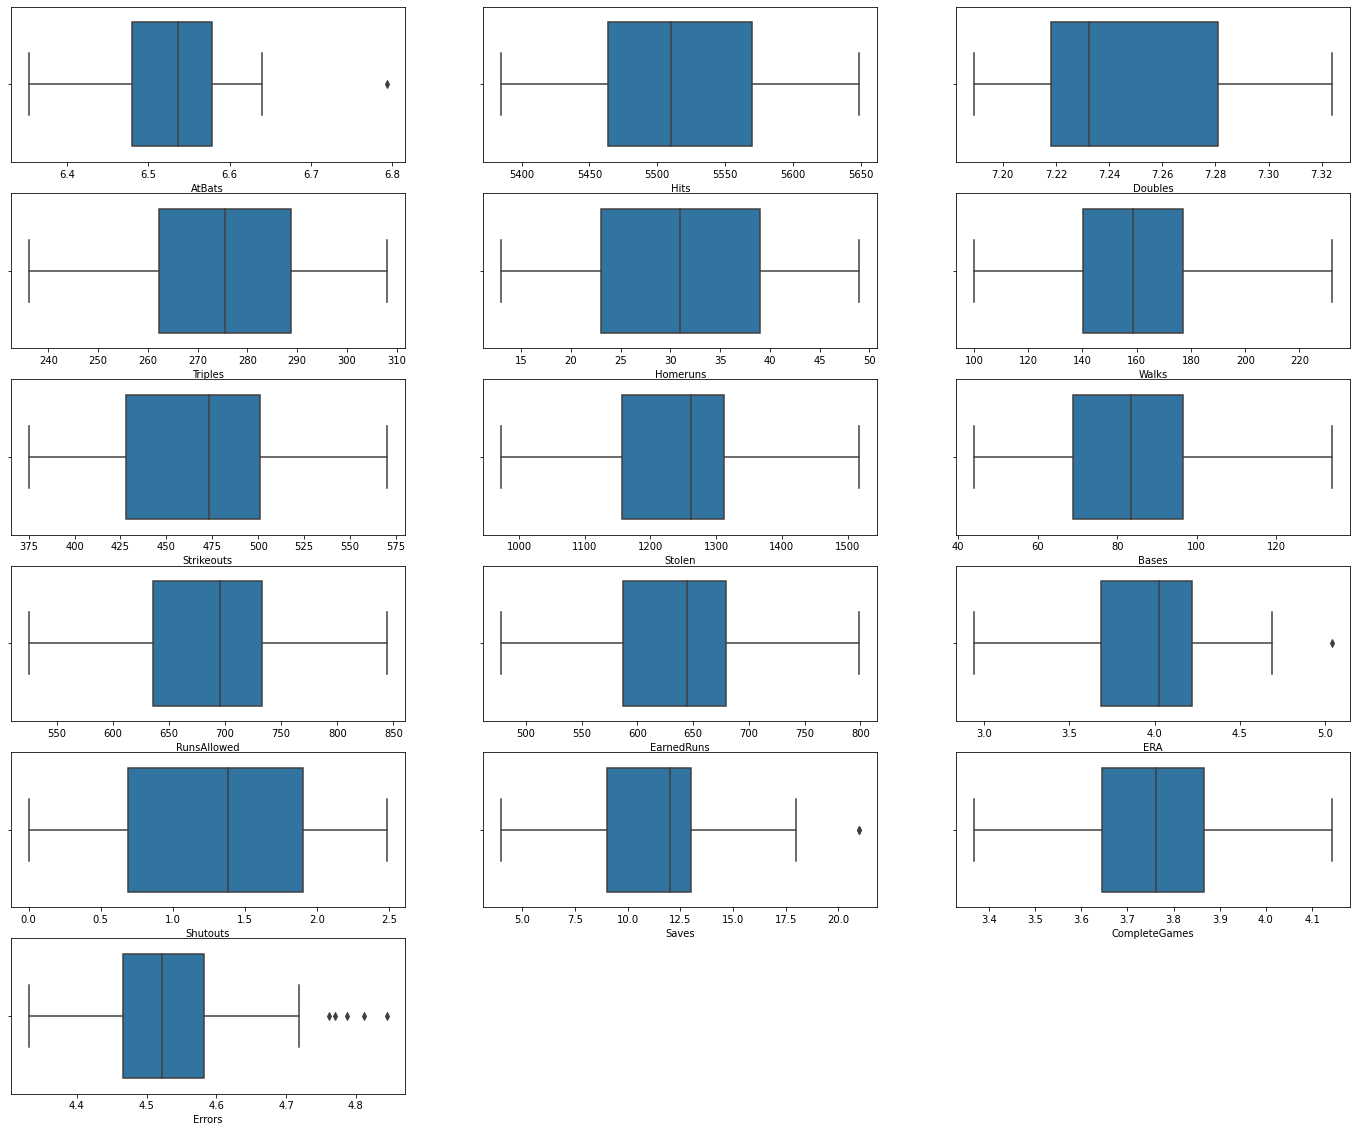

In [26]:
#     plotting boxplot to check outliers

plt.figure(figsize=(24,20))
p= 1
                              
for col in x:
    if p<=16:                                      
        ax=plt.subplot(6,3,p)                          
        sns.boxplot(x[col])
    p+=1
plt.show()

In [ ]:
.
.

In [27]:
from scipy.stats import zscore

(np.abs(zscore(x))<3).all()

AtBats           False
Hits              True
Doubles           True
Triples           True
Homeruns          True
Walks             True
Strikeouts        True
Stolen            True
Bases             True
RunsAllowed       True
EarnedRuns        True
ERA               True
Shutouts          True
Saves             True
CompleteGames     True
Errors            True
dtype: bool

In [28]:
# OUTLIER METHOD

from scipy.stats import zscore

z_scores=zscore(x)
X = x.loc[(abs(z_scores)<3).all(axis=1)]


In [29]:
X.shape  # one rows removed by zscore(outliers removing method)
#         but data too less so don't consider outliers

(29, 16)

checking multicollinearity

In [30]:

# make sure to  use 'variance_inflation_factor' method to check  multicollinearity or not

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   

,features,vif_value
0,AtBats,68069.803445
1,Hits,77840.540846
2,Doubles,124813.629415
3,Triples,727.739184
4,Homeruns,35.147730
5,Walks,292.994699
6,Strikeouts,272.327851
7,Stolen,385.790373
8,Bases,28.181762
9,RunsAllowed,17694.207388


In [31]:
x1= x.drop(['Doubles', 'ERA','Hits','Errors','RunsAllowed'], axis=1)

In [32]:
   # after removing some feature checking again multicollinearity problem
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
features= x1.columns
vif_value= [vif(x1.values, i) for i in range(len(x1.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})  

# after removing features multicollinearity  remains in some features 
#

,features,vif_value
0,AtBats,2684.651371
1,Triples,540.363840
2,Homeruns,27.606979
3,Walks,53.487411
4,Strikeouts,210.209623
5,Stolen,217.936046
6,Bases,21.433117
7,EarnedRuns,312.500080
8,Shutouts,9.497122
9,Saves,23.799329


In [37]:
y= df.wins    # target feature

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [34]:
#  scaling the input features with StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(x1)

In [35]:
#        MAKE FUNCTION FOR BEST RANDOM_STATE
#                IN TRAINING PROCESS           # finding best random_state
def max_score(reg,scaled,y):
    maxf= 0
    rs= 0
    for r_state in range(50,150):
        x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = r_state,test_size=0.30,)
#        rf = RandomForestClassifier()
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        tmp=r2_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum r2_score is at random state :",rs," and it is :",maxf)


In [38]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

max_score(lr,scaled,y)

maximum r2_score is at random state : 50  and it is : 0.7820906371820495
maximum r2_score is at random state : 51  and it is : 0.8457458545120748
maximum r2_score is at random state : 55  and it is : 0.8945027819951238
maximum r2_score is at random state : 60  and it is : 0.9027503883478925
maximum r2_score is at random state : 69  and it is : 0.9063562018305701
maximum r2_score is at random state : 70  and it is : 0.9240915291530314
maximum r2_score is at random state : 83  and it is : 0.9257115779960502
maximum r2_score is at random state : 116  and it is : 0.9287751047593427
maximum r2_score is at random state : 142  and it is : 0.9441231099450016


In [39]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 142,test_size=0.30,)
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_error=', mean_squared_error(y_test,y_pred))
print('mean_absolute_error=', mean_absolute_error(y_test,y_pred))

r2_score= 0.9441231099450016
mean_squared_error= 4.243884291584571
mean_absolute_error= 1.5823824408876324


In [ ]:
GRADIENTBOOSTING

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
max_score(gb,scaled ,y)

maximum r2_score is at random state : 50  and it is : 0.1458045894953185
maximum r2_score is at random state : 51  and it is : 0.4626944047003503
maximum r2_score is at random state : 53  and it is : 0.5486041237397858
maximum r2_score is at random state : 57  and it is : 0.669176983406973
maximum r2_score is at random state : 58  and it is : 0.6934784143039558
maximum r2_score is at random state : 70  and it is : 0.7056228498187402
maximum r2_score is at random state : 103  and it is : 0.7140773884742725


In [42]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 103,test_size=0.30,)
gb= GradientBoostingRegressor(n_estimators=180)
gb.fit(x_train,y_train)

y_pred= gb.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_mean=', mean_squared_error(y_test,y_pred))
print('mean_absolute_error=', mean_absolute_error(y_test,y_pred))

r2_score= 0.7079555183549016
mean_squared_mean= 43.87878199531909
mean_absolute_error= 5.978003897501243


RANDOMFOREST_REEGRESSOR

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
max_score(rf, x1,y)

maximum r2_score is at random state : 50  and it is : 0.5356811371841153
maximum r2_score is at random state : 51  and it is : 0.5684763803680981
maximum r2_score is at random state : 57  and it is : 0.5829277549221279
maximum r2_score is at random state : 62  and it is : 0.695992483280023
maximum r2_score is at random state : 93  and it is : 0.7305279398359159
maximum r2_score is at random state : 101  and it is : 0.7912747310623041


In [130]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 101,test_size=0.30,)
rf= RandomForestRegressor(n_estimators=180,min_samples_split=3)
rf.fit(x_train,y_train)

y_pred= rf.predict(x_test)
print('r2_score=', r2_score(y_test,y_pred))
print('mean_squared_mean=', mean_squared_error(y_test,y_pred))
print('mean_absolute_error=', mean_absolute_error(y_test,y_pred))

r2_score= 0.7700654351936039
mean_squared_mean= 25.33254390533677
mean_absolute_error= 4.1101212522045865


r2_score given by RandomForestRegressor is equal to 77 percent

In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)
max_score(knn, scaled,y)

maximum r2_score is at random state : 50  and it is : 0.42441335740072206
maximum r2_score is at random state : 54  and it is : 0.45785550458715596
maximum r2_score is at random state : 55  and it is : 0.5904349604581403
maximum r2_score is at random state : 57  and it is : 0.614861886570673
maximum r2_score is at random state : 59  and it is : 0.6525612472160356
maximum r2_score is at random state : 85  and it is : 0.6665839478162223
maximum r2_score is at random state : 87  and it is : 0.8082797427652733


In [50]:

x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 87,test_size=0.30,)
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)

y_pred= knn.predict(x_test)
print('r2_score KNeighborsRegressor =', r2_score(y_test,y_pred))
print('mean_squared_mean=', mean_squared_error(y_test,y_pred))
print('mean_absolute_error=', mean_absolute_error(y_test,y_pred))

r2_score AdaBoostRegressor = 0.8082797427652733
mean_squared_mean= 11.777777777777779
mean_absolute_error= 2.888888888888889


r2_score given by AdaBoostRegressor is equal to 73 percent

In [51]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')
max_score(svm, scaled,y)

maximum r2_score is at random state : 50  and it is : 0.7311771299060368
maximum r2_score is at random state : 51  and it is : 0.7391512251148453
maximum r2_score is at random state : 53  and it is : 0.8465867315339821
maximum r2_score is at random state : 60  and it is : 0.8997267243753213


In [53]:
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 60,test_size=0.30,)
svm = SVR(kernel= 'linear')
svm.fit(x_train,y_train)

y_pred= svm.predict(x_test)
print('r2_score with SVR=', r2_score(y_test,y_pred))
print('mean_squared_mean=', mean_squared_error(y_test,y_pred))
print('mean_absolute_error=', mean_absolute_error(y_test,y_pred))

r2_score with SVR= 0.8997267243753213
mean_squared_mean= 9.190478990587831
mean_absolute_error= 2.6047508377982194


In [ ]:
# r2_score with SVR is equal to the  89 percent

 lets's use LassoCV

In [54]:
from sklearn.linear_model import LassoCV
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 116,test_size=0.25,)

lasso = LassoCV()
lasso.fit(x_train, y_train)

alpha = lasso.alpha_
alpha

0.18427435030185368

In [56]:
from sklearn.linear_model import Lasso

L= Lasso(alpha= alpha)
L.fit(x_train, y_train)

y_pred= L.predict(x_test)
print('r2_score with Lasso =', r2_score(y_test,y_pred))
print('mean_squared_mean=', mean_squared_error(y_test,y_pred))
print('mean_absolute_error=', mean_absolute_error(y_test,y_pred))

r2_score with Lasso = 0.8852497912238447
mean_squared_mean= 20.877366109211756
mean_absolute_error= 3.532647064012952


In [ ]:
r2_score of Lasso model is equal to 88 percent

In [58]:
#  LET'S USE CROSS_VALIDATION

from sklearn.model_selection import cross_val_score

In [60]:
# CROSS_VALIDATION WITH              LINEAR_REGRESSION          
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 116,test_size=0.30,)

lr.fit(x_train,y_train)
print('cross_val_score with LINEAR_REGRESSION=',cross_val_score(lr,x_train, y_train,cv= 3).mean())

cross_val_score with LINEAR_REGRESSION= -0.8853834854196713


In [64]:
#   CROSS_VALIDATION WITH   SVR          

x_train,x_test,y_train,y_test=train_test_split(scaled, y,test_size=0.20,random_state = 75)
svm.fit(x_train,y_train)
print('cross_val_score with SVR=',cross_val_score(svm , x_train, y_train,cv=3).mean())

cross_val_score with SVR= 0.8156169568141779


In [67]:
#   CROSS_VALIDATION WITH   RandomForestRegressor          

x_train,x_test,y_train,y_test=train_test_split(scaled, y,test_size=0.20,random_state = 101)
rf.fit(x_train,y_train)
print('cross_val_score =',cross_val_score(rf , x_train, y_train,cv=3).mean())

cross_val_score = 0.4749166254570714


In [70]:
#   CROSS_VALIDATION WITH   KNeighborsRegressor          

x_train,x_test,y_train,y_test=train_test_split(x1, y,test_size=0.20,random_state = 87)

knn.fit(x_train,y_train)
print('cross_val_score =',cross_val_score(knn, x_train, y_train,cv=2).mean())

cross_val_score = 0.41848763871837463


LET'S USE  HYPER PARAMETER TUNNING WITH GRIDSEARCHCV

In [78]:
# 
from sklearn.model_selection import GridSearchCV
SV = SVR()
x_train,x_test,y_train,y_test=train_test_split(scaled, y,random_state = 60,test_size=0.20,)

param= {'kernel':['poly','rbf','linear'],'C':[1,2,],'degree':[2,3]}
grid1 = GridSearchCV(SV,param, cv=3,)

grid1.fit(x_train,y_train)
grid1.best_params_

{'C': 2, 'degree': 2, 'kernel': 'linear'}

In [82]:
sv= SVR(kernel= 'linear', C=2, degree=2)
sv.fit(x_train,y_train)
pred= sv.predict(x_test)
print('r2_score= ', r2_score(y_test, pred))
print('mean_squared_error=',mean_squared_error(y_test,pred))
print('mean_absolute_error=',mean_absolute_error(y_test,pred))
print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=  0.9013273926415263
mean_squared_error= 10.71145970991431
mean_absolute_error= 2.9800338400594106
root_mean_squared_error= 3.2728366457729465


In [83]:
# test & predicted_value

pd.DataFrame({'y_test':y_test, 'predicted_value':pred})

,y_test,predicted_value
20,90,90.826748
14,68,73.044297
19,64,67.033108
25,92,90.175776
9,78,81.437231
4,74,70.285405


In [73]:
import pickle

In [84]:
baseball = 'baseball.pickle'

pickle.dump(sv,open(baseball, 'wb'))